<a href="https://colab.research.google.com/github/Somertonman/hackathon_2023/blob/main/graph_org.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [55]:
#%%capture
!pip install stanza python-docx pymorphy2 matplotlib nltk networkx docx tqdm spicy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import pandas as pd
import spacy
from tqdm import tqdm
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None


In [57]:
!python -m spacy download ru_core_news_lg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-21 13:04:51.379565: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.4/513.4 MB 1.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')


# Data source

In [68]:
!wget https://github.com/Somertonman/hackathon_2023/raw/main/all_parsed_graph.csv

--2023-01-21 13:11:20--  https://github.com/Somertonman/hackathon_2023/raw/main/all_parsed_graph.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Somertonman/hackathon_2023/main/all_parsed_graph.csv [following]
--2023-01-21 13:11:20--  https://raw.githubusercontent.com/Somertonman/hackathon_2023/main/all_parsed_graph.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1697789 (1.6M) [text/plain]
Saving to: ‘all_parsed_graph.csv’

all_parsed_graph.cs 100%[===================>]   1.62M  --.-KB/s    in 0.06s   

2023-01-21 13:11:20 (27.5 MB/s) - ‘all_parsed_graph.csv’ saved [1697789/1697789]



In [59]:
df = pd.read_csv('all_parsed_graph.csv')
df = df.query('name != "себя"').reset_index().drop(columns='index')
df = df[['id', 'task_num',
       'task_text', 'dept', 'task_responsibles_people', 'task_deadline',
       'position', 'name', 'global_deadline', 'Tasks']]
df.head()

,id,task_num,task_text,dept,task_responsibles_people,task_deadline,position,name,global_deadline,Tasks
0,0,Task1,Закупить книги. Срок завершения: 19 апр 15.,Административно-хозяйственный отдел,Ответственность за исполнение распоряжения воз...,2015-04-18,специалист первый категория административно-хо...,кравцов и.е.,2013-04-10,NaN
1,1,Task1,Провести анализ поставщиков для замены вышедше...,Служба ИТ,Ответственность за исполнение распоряжения воз...,2012-10-23,специалист третий категория служба ит,ким юрий иванович,2013-06-02,NaN
2,1,Task2,Выполнить ремонт кабеля сети передачи данных м...,Служба ИТ,Контроль над выполнением приказа возложить на ...,2013-08-11,системный администратор,сергеев андрей,2013-06-02,NaN
3,1,Task3,Создать и настроить виртуальную машину в соотв...,Служба ИТ,Контроль над исполнением распоряжения оставить...,2019-09-09,специалист третий категория,ким юрий иванович,2013-06-02,NaN
4,2,Task1,Провести рефакторинг программного обеспечения ...,Отдел разработки систем,Контроль над исполнением распоряжения оставить...,2020-12-23,контроль над исполнение распоряжение,абаимов симон,2014-10-07,NaN


In [60]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian") 

def Convert(string): 
    li = list(string.split(" ")) 
    return li 

def stem(text):
  my_words = Convert(text)
  l = []
  for word in my_words:
    if word != "специалист":
        l.append(stemmer.stem(word))
  return " ".join(l)

In [61]:
df['position'] = df.apply(lambda x: stem(x['position']), axis=1)

In [62]:
df['position']

0       перв категор административно-хозяйствен отдел
1                               трет категор служб ит
2                               системн администратор
3                                        трет категор
4                     контрол над исполнен распоряжен
                            ...                      
2864    перв категор административно-хозяйствен отдел
2865     руководител административно-хозяйствен отдел
2866    перв категор административно-хозяйствен отдел
2867     руководител административно-хозяйствен отдел
2868     руководител административно-хозяйствен отдел
Name: position, Length: 2869, dtype: object

In [63]:
# https://drive.google.com/file/d/1GIak7jmxhucwpr4VAJxEniinMwOmObPv/view?usp=sharing
!gdown 1GIak7jmxhucwpr4VAJxEniinMwOmObPv

Downloading...
From: https://drive.google.com/uc?id=1GIak7jmxhucwpr4VAJxEniinMwOmObPv
To: /content/json.tar
100% 56.1M/56.1M [00:00<00:00, 261MB/s]


In [ ]:
!mkdir json_dataset
!tar -xvf  '/content/json.tar' -C '/content/json_dataset'

In [69]:
def parse_file(file_name, num):
  df = pd.read_json(file_name).reset_index()

  df['id'] = num

  df = df.query('index not in ("Global_deadline", "Global_supervisor")')
  df['task_text'] = df.apply(lambda x: x['Tasks']['task_text'], axis = 1)
  df['task_responsibles_people'] = df.apply(lambda x: x['Tasks']['task_responsibles_people'], axis = 1)
  df['task_responsibles_groups'] = df.apply(lambda x: x['Tasks']['task_responsibles_groups'], axis = 1)

  df = df[['id', 'index', 'task_responsibles_groups', 'task_responsibles_people']]
  return df.rename(columns={'index':'task_num', 'task_responsibles_groups':'dept'})

In [66]:
df_emp = parse_file('/content/json_dataset/json/0.json', 0)

for i in tqdm(range (1, 10000)):
  file_name = f"/content/json_dataset/json/{i}.json"
  df_one = parse_file(file_name, i)
  df_emp = pd.concat([df_emp, df_one])

df_emp['task_responsibles_people'] = df_emp['task_responsibles_people'].str.lower()
df_emp = df_emp.reset_index().drop(columns=['index'])
df_emp.head()

100%|██████████| 9999/9999 [02:39<00:00, 62.50it/s]


,id,task_num,dept,task_responsibles_people
0,0,Task1,Административно-хозяйственный отдел,ответственность за исполнение распоряжения воз...
1,1,Task1,Служба ИТ,ответственность за исполнение распоряжения воз...
2,1,Task2,Служба ИТ,контроль над выполнением приказа возложить на ...
3,1,Task3,Служба ИТ,контроль над исполнением распоряжения оставить...
4,2,Task1,Отдел разработки систем,контроль над исполнением распоряжения оставить...


In [ ]:
df_emp['name'] =  df_emp.apply(lambda x : ' '.join([ent.text for ent in nlp(x.task_responsibles_people).ents]), axis = 1)
df_emp.head()

# Data cleaning

In [ ]:
df.fillna(0, inplace = True)
df.replace('None', 0, inplace = True)


In [ ]:
import stanza
from stanza.models.common.doc import Document

nlp = stanza.Pipeline(lang='ru', processors='tokenize,lemma', lemma_pretagged=True, tokenize_pretokenized=True)
doc = nlp('специалист третий категория')
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')



In [ ]:
doc = nlp('специалист третий категория')
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')


# EDA

In [ ]:
# some basic stats

documents = df['id'].unique()
departments = df['dept'].unique()
employees = df['name'].unique()
positions = df['position'].unique()


print('Number of docs:', len(documents))
print('Number of depts in the company:', len(departments) )
print('Number of employees in the company:', len(employees))
print('Number of positions in the company total:', len(positions))

## How many documents was analyzed?

In [ ]:
print(documents)

## Company departments

In [ ]:
print(departments)

## Employees

In [73]:
print(employees)

['кравцов и.е.' 'ким юрий иванович' 'сергеев андрей' 'абаимов симон'
 'абаимов симона' 'абашкин орест' 'абалкин зураб' 'андреев с.е.'
 'слесарев а.в' 'абатуров борис' 'миронов к.а.' 'симоново н.с.'
 'абаковый алексей' 'попов а.а.' 'никишин с.е.' 'абашичев алексей'
 'с.с.галкин' 'сергеев ален иванович' 'поспелов н.а.' 'миронов т.п.'
 'александров а.с.' 'семёнов м.с.' 'миронов' 'семёнов' 'семёнов и.а.'
 'попов и.и.' 'коптеловый е.в' 'кравцов' 'смирнов о.а.' 'шихов'
 'шихов р.п.' 'абакуловый пётр' 'абалаково севастьян' 'ведерников и.с.'
 'жуков а.в' 'точновый' 'иванов а.а.' 'р.е.артюхин'
 'александров александр иванович' 'абалаковый севастьян' 'абалдуев олег'
 'петров в.м.' 'никитин ирина петрович' 'андреев к.с.' 'абалакин михаил'
 'сергеев алёна иванович' 'петров' 'абакумов глеб' 'абаков алексей'
 'симонов н.с.' 'львов' 'анненков' 'спецова а.в' 'львов а.м.'
 'анненков и.с.' 'янина и.а.' 'точновое с.о.' 'янин и.а.' 'спецов а.в']


In [72]:
emp_dictionary = { emp : emp for emp in employees }
emp_dictionary['янина и.а.'] = 'янин и.а.'
emp_dictionary['ким юрий иванович'] = 'ким ю.и.'
emp_dictionary['абаимов симона'] = 'абаимов с.'
emp_dictionary['абаимов симон'] = 'абаимов с.'
emp_dictionary['сергеев андрей'] = 'сергеев а.'
emp_dictionary['абашкин орест'] = 'абашкин о.'
emp_dictionary['абалкин зураб'] = 'абалкин з.'
emp_dictionary['абатуров борис'] = 'абатуров б.'
emp_dictionary['симоново н.с.'] = 'симонов н.с.'
emp_dictionary['абаковый алексей'] = 'абаков а.'
emp_dictionary['абашичев алексей'] = 'абашичев а.'
emp_dictionary['с.с.галкин'] = 'галкин c.c.'
emp_dictionary['сергеев ален иванович'] = 'сергеева а.и.'
emp_dictionary['семёнов'] = 'семёнов и.а.'
emp_dictionary['кравцов'] = 'кравцов и.е.'
emp_dictionary['шихов'] = 'шихов р.п.'
emp_dictionary['абакуловый пётр'] = 'абакулов п.'
emp_dictionary['абалаково севастьян'] = 'абалаков с.'
emp_dictionary['артюхин'] = 'артюхин р.е.'
emp_dictionary['александров александр иванович'] = 'александров а.и.'
emp_dictionary['абалаковый севастьян'] = 'абалаков с.'
emp_dictionary['абалдуев олег'] = 'абалдуев о.'
emp_dictionary['никитин ирина петрович'] = 'никитина и.п.'
emp_dictionary['абалакин михаил'] = 'абалакин м.'
emp_dictionary['сергеев алёна иванович'] = 'сергеева а.и.'
emp_dictionary['петров'] = 'петров в.м.'
emp_dictionary['львов'] = 'львов а.м.'
emp_dictionary['абаков алексей'] = 'абаков а.'
emp_dictionary['анненков'] = 'анненков и.с.'
emp_dictionary['точновый'] = 'точнов с.о.'
emp_dictionary['спецова а.в'] = 'спецов а.в'
emp_dictionary['миронов'] = 'миронов т.п'
emp_dictionary['семёнов'] = 'миронов и.а'
emp_dictionary['коптеловый е.в'] = 'коптелов е.в'
emp_dictionary['точновое с.о.'] = 'точнов с.о.'
emp_dictionary['р.е.артюхин'] = 'артюхин р.е.'

In [74]:
df['name'] = df['name'].map(emp_dictionary)

# Graph

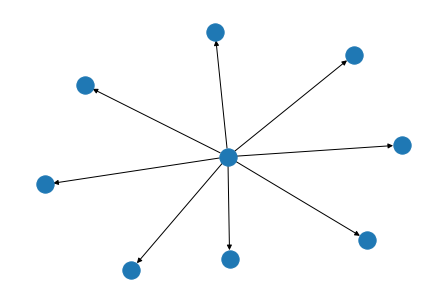

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

DG = nx.DiGraph()

comp_name = 'COMPANY'

for i in list(departments):
    DG.add_edge(comp_name, i)
    

nx.draw(DG)


## Multilevel graph

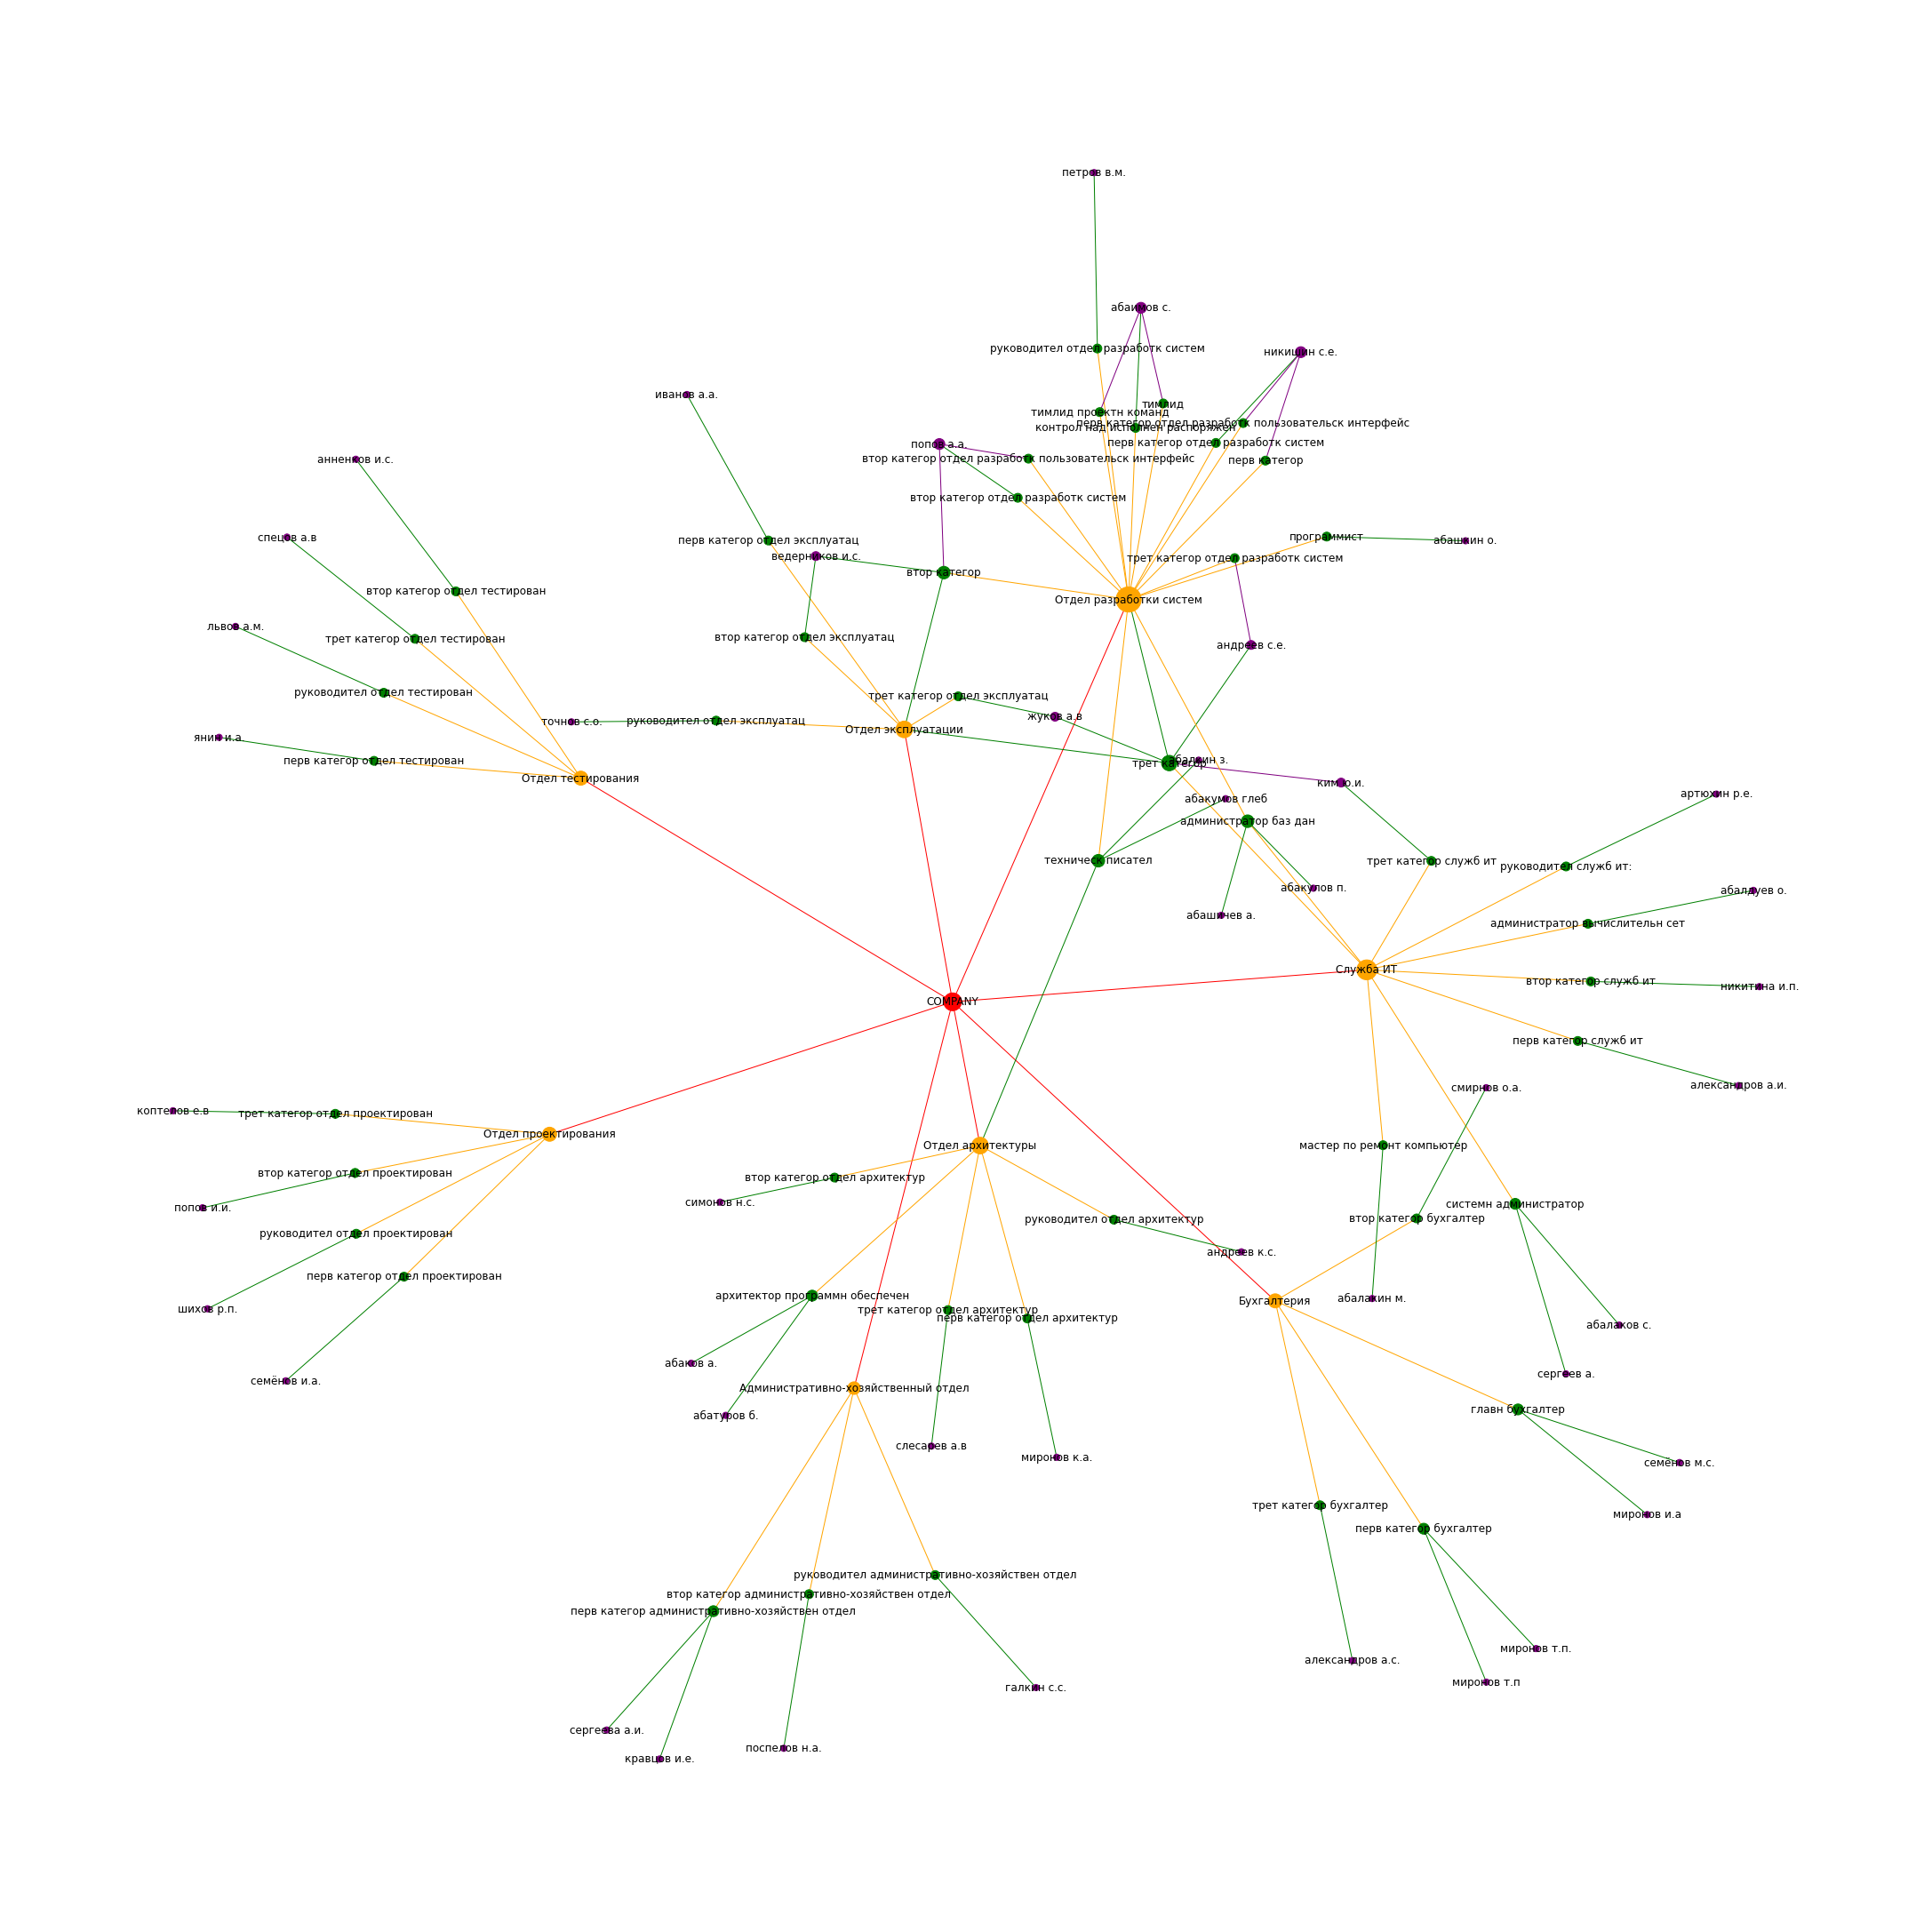

In [75]:
# create a graph object
G = nx.Graph()

comp_name = 'COMPANY'

for z in list(departments):
    G.add_edge(comp_name, z)
    # iterate through the rows of the DataFrame
    for i, row in df.iterrows():
        # add task_responsibles_groups node
        dept = row["dept"]
        G.add_node(dept, size=df["dept"].value_counts()[dept])
        # add position node
        position = row["position"]
        G.add_node(position, size=df["position"].value_counts()[position])
        # add name node
        name = row["name"]
        G.add_node(name, size=df["name"].value_counts()[name])
        # add edges between task_responsibles_groups and position
        G.add_edge(dept, position)
        # add edges between position and name
        G.add_edge(position, name)

# draw the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
pos = nx.spring_layout(G) # spring layout to calculate node positions

# create a list of node sizes
node_sizes = []
for node in G.nodes():
    node_sizes.append(G.degree(node)*50)

# create a list of node colors
node_colors = []
for node in G.nodes():
    if node in departments:
        node_colors.append("orange")
    elif node in df["position"].unique():
        node_colors.append("green")
    elif node in df["name"].unique():
        node_colors.append("purple")
    else:
        node_colors.append("red")

# create a list of edge colors
edge_colors = []
for edge in G.edges():
    if edge[0] in departments:
        edge_colors.append("orange")
    elif edge[0] in df["position"].unique():
        edge_colors.append("green")
    elif edge[0] in df["name"].unique():
        edge_colors.append("purple")
    else:
        edge_colors.append("red")

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color=edge_colors)


# Document checker

In [76]:
from google.colab import files

!test -d docx_for_check || mkdir docx_for_check

uploaded = files.upload()

print('uploaded to the "/content" folder')


Saving 1001.docx to 1001.docx
Saving 1002.docx to 1002.docx
uploaded to the "/content" folder


## Parsing text from docx files

In [77]:
from docx import Document
import os
import random

def get_text(filename):
    doc = Document(f'/content/{filename}')
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

folder_path = '/content'
docx_files = [f for f in os.listdir(folder_path) if f.endswith('.docx')]
random_file = random.choice(docx_files)

text = get_text(random_file)
if docx_files:
    random_file = random.choice(docx_files)
    text = get_text(random_file)
    print(text)
else:
    print("No docx files found in the directory")



ООО "Мегасофт"


Приказ
Для организации мероприятия "День заказчика" приказываю:
○
Доработать функцию сохранения информации в базу данных. Срок завершения: 27.12.2012.
Обеспечение выполнения возложить на специалиста первой категории отдела разработки пользовательских интерфейсов Никишина С.Е.
○ Провести анализ неисправности работы API и обеспечить устранение ошибки.
Дата окончания: 20.01.21.
За контроль над исполнением распоряжения назначить ответственным специалиста первой категории отдела разработки систем Никишина С.Е.
○
Использовать автоматизированное тестирование перед сборкой системы.
Определить срок исполнения задачи вплоть до 22 апр 2019 г..
Контроль над исполнением распоряжения оставить за специалистом первой категории отдела разработки пользовательских интерфейсов Никишиным С.Е.
	i) Разработать коннектор для интеграции со сторонним программным обеспечением.
Определить срок исполнения задачи вплоть до 21.07.18.
За контроль и выполнение назначить ответственным администратора б

### Check a given name and position on the graph

In [100]:
import pymorphy2
def is_name_position_in_graph(G, name, position):
    if not name and not position:
        return False
    morph = pymorphy2.MorphAnalyzer()
    if name:
        name_norm = morph.parse(name)[0].normal_form
    if position:
        position_norm = morph.parse(position)[0].normal_form

    for node in G.nodes():
        node_norm = morph.parse(node)[0].normal_form
        if node_norm != name_norm:
            continue
        if not position:
            return True
        else:
            neighbors = G.neighbors(node)
            for neighbor in neighbors:
                neighbor_norm = morph.parse(neighbor)[0].normal_form
                if neighbor_norm == position_norm:
                    return True
    return False


In [101]:
def name_to_initials(full_name):
    if not full_name:
        return ""
    if '.' in full_name:
        return full_name
    name_parts = full_name.split()
    lastname = name_parts[0]
    initials = "".join([part[0] + "." for part in name_parts[1:]])
    return lastname + " " + initials


In [102]:
name = 'сергеев андрей'
name = name_to_initials(name)
print(name)

сергеев а.


In [104]:
position = ''
print(is_name_position_in_graph(G, name, position))

True


# Graph finding paths

In [ ]:
results = []
for n1 in G.nodes():
    for n2 in G.nodes():
        shortest_path = nx.single_source_dijkstra(G, source=n1, target=n2)
        results.append(shortest_path)


In [ ]:
shortest_path = nx.single_source_dijkstra(G, source='ведерников и.с.', target='COMPANY')
print(shortest_path)


# SPACY

In [ ]:
!python -m spacy download ru_core_news_lg


In [ ]:
import spacy
nlp = spacy.load('ru_core_news_lg')


# Helper functions

In [ ]:
shortest_path = nx.single_source_dijkstra(G, source='ведерников и.с.', target='COMPANY')
print(shortest_path)

Is a given person works in the company

In [ ]:
def is_employee(graph, company, name):
  try:
    shortest_path = nx.single_source_dijkstra(G, source=company, target=name)
    print(shortest_path)
    if shortest_path[0] == 3 and shortest_path[1][-1] == name:
      return True
    else:
      return False
  except:
    return False

is_employee(G, 'COMPANY', 'ведерников и.с.')

In [ ]:
is_employee(G, 'COMPANY', 'абатуров борис')

Is a given person works in the company

In [ ]:
def is_employee_to_dept(graph, company, dept, name):
  try:
    shortest_path = nx.single_source_dijkstra(G, source=company, target=name)
    print(shortest_path)
    if shortest_path[0] == 3 and shortest_path[1][1] == dept:
      return True
    else:
      return False
  except:
    return False


is_employee_to_dept(G, 'COMPANY', 'Отдел эксплуатации', 'ведерников и.с.')

In [ ]:
is_employee_to_dept(G, 'COMPANY', 'Отдел эксплуатации', 'абатуров борис')

In [ ]:
results = []
for n1 in G.nodes():
    for n2 in G.nodes():
        shortest_path = nx.single_source_dijkstra(G, source=n1, target=n2)
        results.append(shortest_path)


In [ ]:
#[x for x in results if x[0] != 3]